In [109]:
# Import "tripadvisor_hotel_reviews.csv" file into DataFrame
import pandas as pd

# Import WordCloud method from wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import the list of stop-words from NLTK library
from nltk.corpus import stopwords

# Import pos_tag method from NLTK library
from nltk import pos_tag

# Import spacy library and visualization module (displacy)
import spacy
from spacy import displacy

df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [110]:
df.iloc[0]["Review"]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [111]:
df.iloc[1]["Review"]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

# **Text Preprocessing**

**Text Cleaning**

In [112]:
# Regular Expression library for text cleaning
import re
# Removing punctuation and numbers (i.e., keep only English alphabets)
df['clean_text'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# Make texts into lowercase alphabets
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
df.head()

,Review,Rating,clean_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [113]:
df.iloc[0]["Review"]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [114]:
df.iloc[0]["clean_text"]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay  parking night  '

# Subsetting Datasets

The purpose of the code below is to subset the dataset in two datasets: 1) High-Ranked Reviews and 2) Low-Ranked Reviews.

In [115]:
#This code was created using GenAI

#High ranking ratings of 3 & 4 are contained in a subset of dataset
high_ranking_reviews = df[df['Rating'].isin([4,5])]
print(high_ranking_reviews.head())

#Create subset into new CSV file
high_ranking_reviews.to_csv('high_ranking_reviews.csv', index=False)

                                              Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   
5  love monaco staff husband stayed hotel crazy w...       5   
6  cozy stay rainy city, husband spent 7 nights m...       5   

                                          clean_text  
0  nice hotel expensive parking got good deal sta...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  
5  love monaco staff husband stayed hotel crazy w...  
6  cozy stay rainy city husband spent  nights mon...  


In [116]:
high_ranking_reviews = pd.read_csv('/kaggle/working/high_ranking_reviews.csv')
high_ranking_reviews

,Review,Rating,clean_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...
...,...,...,...
15088,great play stay stay loyal inn package deal ha...,5,great play stay stay loyal inn package deal ha...
15089,great choice wife chose best western quite bit...,5,great choice wife chose best western quite bit...
15090,good bed clean convenient just night happy sta...,4,good bed clean convenient just night happy sta...
15091,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not sta...


In [117]:
#This code was created using GenAI

#Low ranking ratings of 1 & 2 are contained in a subset of dataset
low_ranking_reviews = df[df['Rating'].isin([1, 2])]
print(low_ranking_reviews.head())

#Create subset into new CSV file
low_ranking_reviews.to_csv('low_ranking_reviews.csv', index=False)

                                               Review  Rating  \
1   ok nothing special charge diamond member hilto...       2   
10  poor value stayed monaco seattle july, nice ho...       2   
15  horrible customer service hotel stay february ...       1   
16  disappointed say anticipating stay hotel monac...       2   
24  great location need internally upgrade advanta...       2   

                                           clean_text  
1   ok nothing special charge diamond member hilto...  
10  poor value stayed monaco seattle july nice hot...  
15  horrible customer service hotel stay february ...  
16  disappointed say anticipating stay hotel monac...  
24  great location need internally upgrade advanta...  


In [118]:
low_ranking_reviews = pd.read_csv('/kaggle/working/low_ranking_reviews.csv')
low_ranking_reviews

,Review,Rating,clean_text
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...
...,...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2,deceptive staff deceptive desk staff claiming ...
3210,not impressed unfriendly staff checked asked h...,2,not impressed unfriendly staff checked asked h...
3211,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...
3212,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


In [119]:
high_ranking_reviews['Rating'].value_counts()

Rating
5    9054
4    6039
Name: count, dtype: int64

In [120]:
low_ranking_reviews['Rating'].value_counts()

Rating
2    1793
1    1421
Name: count, dtype: int64

# Word Cloud

Word Cloud for High Rating Reviews

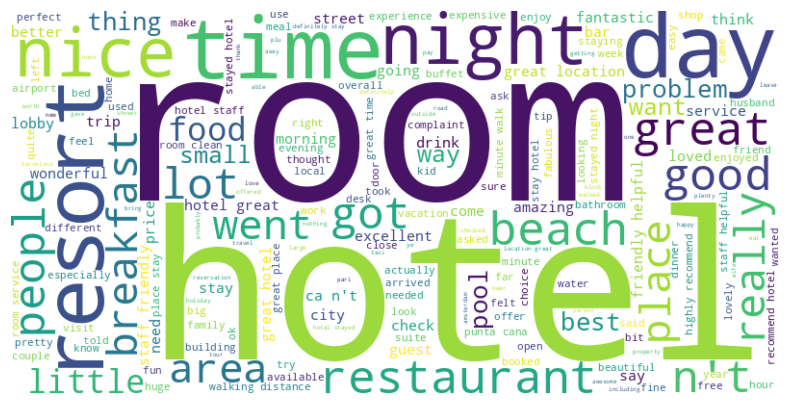

In [121]:
# Part of this code was used with GenAI

# Retreive original text from the first 8,223 rows from the high_rankings_reviews dataset
high_rating_sample = high_ranking_reviews.iloc[:15093]['Review']

# Generate Word Cloud and visualize it
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(high_rating_sample))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for Low Rating Reviews

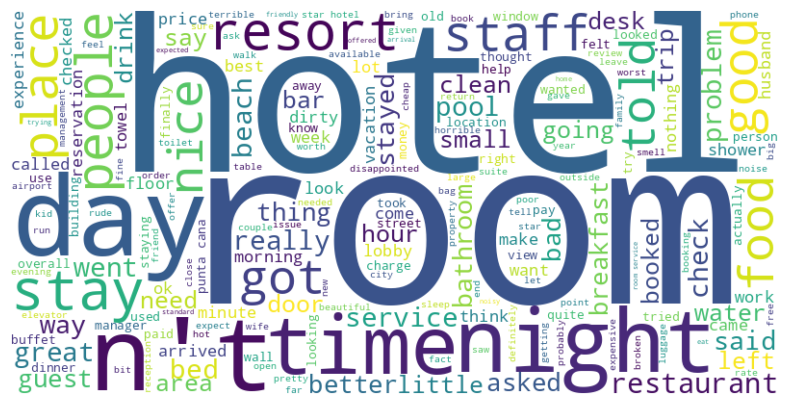

In [122]:
# Part of this code was used with GenAI

# Retreive original text from the first 3,214 rows from the low_rankings_reviews dataset
low_rating_sample = low_ranking_reviews.iloc[:3214]['Review']

# Generate Word Cloud and visualize it
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(low_rating_sample))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Syntax Parsing

High Ranking Rating Reviews

In [123]:
# Initialize the spacy model 
nlp = spacy.load('en_core_web_sm')

# Retreive original text from the first review
sample = high_ranking_reviews.iloc[0]['Review']

# Apply dependency parsing and visualization dependency between words
doc = nlp(sample)
displacy.render(doc, style='dep', jupyter=True, options={'distance':100})

Low Ranking Rating Reviews

In [124]:
# Initialize the spacy model 
nlp = spacy.load('en_core_web_sm')

# Retreive original text from the first review
sample = low_ranking_reviews.iloc[0]['Review']

# Apply dependency parsing and visualization dependency between words
doc = nlp(sample)
displacy.render(doc, style='dep', jupyter=True, options={'distance':100})

# Named Entity Recognition

In [125]:
# Subset the dataset to get the first 8000 rows of review texts
sample = high_ranking_reviews.iloc[:10]['Review']

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Process each review text for Named Entity Recognition
for Review in sample:
    doc = nlp(Review)
    print(f"Named entities in review: '{Review}'")
    for ent in doc.ents:
        print(ent.text, ent.label_)
    print()  # Blank line for separation between reviews

Named entities in review: 'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '
late evening TIME
40 parking night QUANTITY

Named entities in review: 'unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine c

In [126]:
# This code was created using GenAI

# Retreive original text from the first review
high_rating_sample = high_ranking_reviews.iloc[:8000]['Review']

nlp = spacy.load('en_core_web_sm')

# Initialize a list to store named entities
named_entities = []

# Process each review text for Named Entity Recognition
for Review in high_rating_sample:
    doc = nlp(Review)
    for ent in doc.ents:
        named_entities.append((ent.text, ent.label_))
        
# named_entities now contains tuples of (entity_text, entity_label) for all named entities found

In [127]:
# Visualize NER
displacy.render(doc, style='ent', jupyter=True)

# Sentiment Analysis

High Rating Review

In [180]:
#This code was created using GenAI

polarity_scores = []
subjectivity_scores = []

# Iterate through the first 15,000 reviews
for i in range(15000):
    review = high_ranking_reviews.iloc[i]['Review']
    blob = TextBlob(review)
    sentiment = blob.sentiment
    polarity_scores.append(sentiment.polarity)
    subjectivity_scores.append(sentiment.subjectivity)

# Example: Print average polarity and subjectivity
average_polarity = sum(polarity_scores) / len(polarity_scores)
average_subjectivity = sum(subjectivity_scores) / len(subjectivity_scores)
print("Average Polarity =", average_polarity)
print("Average Subjectivity =", average_subjectivity)

Average Polarity = 0.3365428866820293
Average Subjectivity = 0.6022537555635061


In [185]:
# Sentiment Analysis with VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(high_rating_sample)
print(scores)

{'neg': 0.093, 'neu': 0.646, 'pos': 0.261, 'compound': 0.9626}


In [186]:
# Sentiment Analysis with NLTK
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(high_rating_sample)
print(scores)

{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}


In [187]:
# Sentiment Analysis with Transformers
from transformers import pipeline

sentiment = pipeline('sentiment-analysis')
scores = sentiment(high_rating_sample)
print(scores)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.7051081657409668}]


Low Rating Review

In [181]:
#This code was created using GenAI

polarity_scores = []
subjectivity_scores = []

# Iterate through the first 3,214 reviews
for i in range(3214):
    review = low_ranking_reviews.iloc[i]['Review']
    blob = TextBlob(review)
    sentiment = blob.sentiment
    polarity_scores.append(sentiment.polarity)
    subjectivity_scores.append(sentiment.subjectivity)

# Example: Print average polarity and subjectivity
average_polarity = sum(polarity_scores) / len(polarity_scores)
average_subjectivity = sum(subjectivity_scores) / len(subjectivity_scores)
print("Average Polarity =", average_polarity)
print("Average Subjectivity =", average_subjectivity)

Average Polarity = 0.03391286363601061
Average Subjectivity = 0.5485728456263277


In [182]:
# Sentiment Analysis with VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(low_rating_sample)
print(scores)

{'neg': 0.092, 'neu': 0.711, 'pos': 0.197, 'compound': 0.987}


In [183]:
# Sentiment Analysis with NLTK
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(low_rating_sample)
print(scores)

{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'compound': 0.9787}


In [184]:
# Sentiment Analysis with Transformers
from transformers import pipeline

sentiment = pipeline('sentiment-analysis')
scores = sentiment(low_rating_sample)
print(scores)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.9968512654304504}]


# Emotion Analysis

High Rating Review

In [136]:
# Emotion Analysis with Transformer
from transformers import pipeline

emotion = pipeline('text-classification',
                   model="j-hartmann/emotion-english-distilroberta-base",
                   return_all_scores=True)
scores = emotion(high_rating_sample)
scores

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.11235612630844116},
  {'label': 'disgust', 'score': 0.006068318150937557},
  {'label': 'fear', 'score': 0.19685369729995728},
  {'label': 'joy', 'score': 0.28844019770622253},
  {'label': 'neutral', 'score': 0.1604398936033249},
  {'label': 'sadness', 'score': 0.1153772845864296},
  {'label': 'surprise', 'score': 0.12046442180871964}]]

Low Rating Review

In [137]:
# Emotion Analysis with Transformer
from transformers import pipeline

emotion = pipeline('text-classification',
                   model="j-hartmann/emotion-english-distilroberta-base",
                   return_all_scores=True)
scores = emotion(low_rating_sample)
scores

[[{'label': 'anger', 'score': 0.17909450829029083},
  {'label': 'disgust', 'score': 0.007720851805061102},
  {'label': 'fear', 'score': 0.2545906603336334},
  {'label': 'joy', 'score': 0.03937732055783272},
  {'label': 'neutral', 'score': 0.13087256252765656},
  {'label': 'sadness', 'score': 0.21185164153575897},
  {'label': 'surprise', 'score': 0.17649240791797638}]]

# Word Tokenization

In [138]:
# Import word_tokenize method form nltk library
from nltk.tokenize import word_tokenize

# Word tokenization for High Ranking Review
high_ranking_reviews['word_token'] = high_ranking_reviews['clean_text'].apply(lambda x: word_tokenize(x))
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh..."


In [139]:
print(high_ranking_reviews.iloc[0]["word_token"])

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'just', 'noisy', 'neighbors', 'aveda', 'bath', 'products', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', 'parking', 'night']


In [140]:
# Word tokenization for Low Ranking Reviews Dataset
low_ranking_reviews['word_token'] = low_ranking_reviews['clean_text'].apply(lambda x: word_tokenize(x))
low_ranking_reviews.head()

,Review,Rating,clean_text,word_token
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n..."
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,"[horrible, customer, service, hotel, stay, feb..."
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...,"[disappointed, say, anticipating, stay, hotel,..."
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...,"[great, location, need, internally, upgrade, a..."


In [141]:
print(low_ranking_reviews.iloc[0]["word_token"])

['ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', 'th', 'anniversary', 'seattle', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'description', 'not', 'suite', 'bedroom', 'bathroom', 'standard', 'hotel', 'room', 'took', 'printed', 'reservation', 'desk', 'showed', 'said', 'things', 'like', 'tv', 'couch', 'ect', 'desk', 'clerk', 'told', 'oh', 'mixed', 'suites', 'description', 'kimpton', 'website', 'sorry', 'free', 'breakfast', 'got', 'kidding', 'embassy', 'suits', 'sitting', 'room', 'bathroom', 'bedroom', 'unlike', 'kimpton', 'calls', 'suite', 'day', 'stay', 'offer', 'correct', 'false', 'advertising', 'send', 'kimpton', 'preferred', 'guest', 'website', 'email', 'asking', 'failure', 'provide', 'suite', 'advertised', 'website', 'reservation', 'description', 'furnished', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk', 'manager', 'duty', 'did', 'not', 'reply', 'solution', 'send', 'email', 'trip', 'guest', 'survey', 'did',

# Stop-Words Removal

High Ranking Rating Reviews 

In [142]:
# Retrievel the list of English stop-words
stop_words = set(stopwords.words('english'))

# Remove stop-words for high ranking reviews dataset
high_ranking_reviews['filtered_words'] = high_ranking_reviews['word_token'].apply(lambda x: [word for word in x if word not in stop_words])
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ..."
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh..."


Low Ranking Rating Reviews 

In [143]:
# Remove stop-words for low ranking reviews dataset
low_ranking_reviews['filtered_words'] = low_ranking_reviews['word_token'].apply(lambda x: [word for word in x if word not in stop_words])
low_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n...","[poor, value, stayed, monaco, seattle, july, n..."
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,"[horrible, customer, service, hotel, stay, feb...","[horrible, customer, service, hotel, stay, feb..."
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...,"[disappointed, say, anticipating, stay, hotel,...","[disappointed, say, anticipating, stay, hotel,..."
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...,"[great, location, need, internally, upgrade, a...","[great, location, need, internally, upgrade, a..."


# Stemming

In [144]:
# Import PorterStemmer from NLTK library
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
porter = PorterStemmer()
# Apply stemming
high_ranking_reviews['stemmed_words'] = high_ranking_reviews['filtered_words'].apply(lambda x: [porter.stem(word) for word in x])
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr..."
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[cozi, stay, raini, citi, husband, spent, nigh..."


In [145]:
# Show how words changed after stemming (from the first review)
comp_list = [ high_ranking_reviews.iloc[0]["filtered_words"], high_ranking_reviews.iloc[0]["stemmed_words"] ]
comp_df = pd.DataFrame(comp_list)
comp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,nice,hotel,expensive,parking,got,good,deal,stay,hotel,anniversary,...,great,walking,distance,shopping,overall,nice,experience,pay,parking,night
1,nice,hotel,expens,park,got,good,deal,stay,hotel,anniversari,...,great,walk,distanc,shop,overal,nice,experi,pay,park,night


In [146]:
# Apply stemming - Low Ranking Reviews
low_ranking_reviews['stemmed_words'] = high_ranking_reviews['filtered_words'].apply(lambda x: [porter.stem(word) for word in x])
low_ranking_reviews.head()

# Show how words changed after stemming (from the first review)
comp_list = [ low_ranking_reviews.iloc[0]["filtered_words"], low_ranking_reviews.iloc[0]["stemmed_words"] ]
comp_df = pd.DataFrame(comp_list)
comp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
0,ok,nothing,special,charge,diamond,member,hilton,decided,chain,shot,...,clean,business,hotel,super,high,rates,better,chain,hotels,seattle
1,nice,hotel,expens,park,got,good,deal,stay,hotel,anniversari,...,None,None,None,None,None,None,None,None,None,None


# Lemmatization

In [147]:
# First, download WordNet database from NLTK library
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [148]:
# Unzip WordNet database manually to use it
!unzip -o "/usr/share/nltk_data/corpora/wordnet.zip" -d "/usr/share/nltk_data/corpora/"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [149]:
# Import WordNetLemmatizer and WordNet dictionary from NLTK library
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization - High Ranking Reviews
high_ranking_reviews['lemmatized_words'] = high_ranking_reviews['filtered_words'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr...","[love, monaco, staff, husband, stayed, hotel, ..."
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[cozi, stay, raini, citi, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh..."


In [150]:
# Apply lemmatization - Low Ranking Reviews
low_ranking_reviews['lemmatized_words'] = low_ranking_reviews['filtered_words'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
low_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[nice, hotel, expens, park, got, good, deal, s...","[ok, nothing, special, charge, diamond, member..."
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n...","[poor, value, stayed, monaco, seattle, july, n...","[uniqu, great, stay, wonder, time, hotel, mona...","[poor, value, stayed, monaco, seattle, july, n..."
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,"[horrible, customer, service, hotel, stay, feb...","[horrible, customer, service, hotel, stay, feb...","[great, stay, great, stay, went, seahawk, game...","[horrible, customer, service, hotel, stay, feb..."
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...,"[disappointed, say, anticipating, stay, hotel,...","[disappointed, say, anticipating, stay, hotel,...","[love, monaco, staff, husband, stay, hotel, cr...","[disappointed, say, anticipating, stay, hotel,..."
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...,"[great, location, need, internally, upgrade, a...","[great, location, need, internally, upgrade, a...","[cozi, stay, raini, citi, husband, spent, nigh...","[great, location, need, internally, upgrade, a..."


# N-grams

High Ranking Rating Reviews

In [151]:
# Import ngrams method from NLTK library
from nltk.util import ngrams

# Create bigrams and trigrams
high_ranking_reviews['2-grams'] = high_ranking_reviews['lemmatized_words'].apply(lambda x: list(ngrams(x, 2)))
high_ranking_reviews['3-grams'] = high_ranking_reviews['lemmatized_words'].apply(lambda x: list(ngrams(x, 3)))
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words,2-grams,3-grams
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d...","[(nice, hotel), (hotel, expensive), (expensive...","[(nice, hotel, expensive), (hotel, expensive, ..."
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, great), (great, stay), (stay, wonder...","[(unique, great, stay), (great, stay, wonderfu..."
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, stay), (stay, great), (great, stay), ...","[(great, stay, great), (stay, great, stay), (g..."
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr...","[love, monaco, staff, husband, stayed, hotel, ...","[(love, monaco), (monaco, staff), (staff, husb...","[(love, monaco, staff), (monaco, staff, husban..."
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[cozi, stay, raini, citi, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[(cozy, stay), (stay, rainy), (rainy, city), (...","[(cozy, stay, rainy), (stay, rainy, city), (ra..."


Low Ranking Rating Reviews

In [152]:
# Create bigrams and trigrams
low_ranking_reviews['2-grams'] = low_ranking_reviews['lemmatized_words'].apply(lambda x: list(ngrams(x, 2)))
low_ranking_reviews['3-grams'] = low_ranking_reviews['lemmatized_words'].apply(lambda x: list(ngrams(x, 3)))
low_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words,2-grams,3-grams
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[nice, hotel, expens, park, got, good, deal, s...","[ok, nothing, special, charge, diamond, member...","[(ok, nothing), (nothing, special), (special, ...","[(ok, nothing, special), (nothing, special, ch..."
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n...","[poor, value, stayed, monaco, seattle, july, n...","[uniqu, great, stay, wonder, time, hotel, mona...","[poor, value, stayed, monaco, seattle, july, n...","[(poor, value), (value, stayed), (stayed, mona...","[(poor, value, stayed), (value, stayed, monaco..."
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,"[horrible, customer, service, hotel, stay, feb...","[horrible, customer, service, hotel, stay, feb...","[great, stay, great, stay, went, seahawk, game...","[horrible, customer, service, hotel, stay, feb...","[(horrible, customer), (customer, service), (s...","[(horrible, customer, service), (customer, ser..."
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...,"[disappointed, say, anticipating, stay, hotel,...","[disappointed, say, anticipating, stay, hotel,...","[love, monaco, staff, husband, stay, hotel, cr...","[disappointed, say, anticipating, stay, hotel,...","[(disappointed, say), (say, anticipating), (an...","[(disappointed, say, anticipating), (say, anti..."
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...,"[great, location, need, internally, upgrade, a...","[great, location, need, internally, upgrade, a...","[cozi, stay, raini, citi, husband, spent, nigh...","[great, location, need, internally, upgrade, a...","[(great, location), (location, need), (need, i...","[(great, location, need), (location, need, int..."


# Making New Text after Text Preprocessing

High Ranking Rating Reviews

In [153]:
# First, we make "lemmatized_words" into "new_text", by converting 
# the list of words into a single string (text with a space between words)
high_ranking_reviews['new_text'] = high_ranking_reviews['lemmatized_words'].apply(lambda x: ' '.join(x))
high_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words,2-grams,3-grams,new_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d...","[(nice, hotel), (hotel, expensive), (expensive...","[(nice, hotel, expensive), (hotel, expensive, ...",nice hotel expensive parking got good deal sta...
1,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, great), (great, stay), (stay, wonder...","[(unique, great, stay), (great, stay, wonderfu...",unique great stay wonderful time hotel monaco ...
2,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, stay), (stay, great), (great, stay), ...","[(great, stay, great), (stay, great, stay), (g...",great stay great stay went seahawk game awesom...
3,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr...","[love, monaco, staff, husband, stayed, hotel, ...","[(love, monaco), (monaco, staff), (staff, husb...","[(love, monaco, staff), (monaco, staff, husban...",love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[cozi, stay, raini, citi, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[(cozy, stay), (stay, rainy), (rainy, city), (...","[(cozy, stay, rainy), (stay, rainy, city), (ra...",cozy stay rainy city husband spent night monac...


Low Ranking Rating Reviews

In [154]:
# the list of words into a single string (text with a space between words)
low_ranking_reviews['new_text'] = low_ranking_reviews['lemmatized_words'].apply(lambda x: ' '.join(x))
low_ranking_reviews.head()

,Review,Rating,clean_text,word_token,filtered_words,stemmed_words,lemmatized_words,2-grams,3-grams,new_text
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[nice, hotel, expens, park, got, good, deal, s...","[ok, nothing, special, charge, diamond, member...","[(ok, nothing), (nothing, special), (special, ...","[(ok, nothing, special), (nothing, special, ch...",ok nothing special charge diamond member hilto...
1,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,"[poor, value, stayed, monaco, seattle, july, n...","[poor, value, stayed, monaco, seattle, july, n...","[uniqu, great, stay, wonder, time, hotel, mona...","[poor, value, stayed, monaco, seattle, july, n...","[(poor, value), (value, stayed), (stayed, mona...","[(poor, value, stayed), (value, stayed, monaco...",poor value stayed monaco seattle july nice hot...
2,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,"[horrible, customer, service, hotel, stay, feb...","[horrible, customer, service, hotel, stay, feb...","[great, stay, great, stay, went, seahawk, game...","[horrible, customer, service, hotel, stay, feb...","[(horrible, customer), (customer, service), (s...","[(horrible, customer, service), (customer, ser...",horrible customer service hotel stay february ...
3,disappointed say anticipating stay hotel monac...,2,disappointed say anticipating stay hotel monac...,"[disappointed, say, anticipating, stay, hotel,...","[disappointed, say, anticipating, stay, hotel,...","[love, monaco, staff, husband, stay, hotel, cr...","[disappointed, say, anticipating, stay, hotel,...","[(disappointed, say), (say, anticipating), (an...","[(disappointed, say, anticipating), (say, anti...",disappointed say anticipating stay hotel monac...
4,great location need internally upgrade advanta...,2,great location need internally upgrade advanta...,"[great, location, need, internally, upgrade, a...","[great, location, need, internally, upgrade, a...","[cozi, stay, raini, citi, husband, spent, nigh...","[great, location, need, internally, upgrade, a...","[(great, location), (location, need), (need, i...","[(great, location, need), (location, need, int...",great location need internally upgrade advanta...


# **Text Preprocessing**

# BoW Model

High Ranking Rating Reviews

In [155]:
# Import CountVectorizer method (BoW model) from sklearn library
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the BoW model via CountVectorizer
vectorizer = CountVectorizer()

# Transform the textual data via BoW model 
bow = vectorizer.fit_transform(high_ranking_reviews["new_text"])

# Retrieve the Word names (features)
words = vectorizer.get_feature_names_out()
# Retreive word frequency matrix
bow_matrix = bow.toarray()

# Generate BoW DataFrame
df_high_rating_bow = pd.DataFrame(bow_matrix, columns=words)
df_high_rating_bow.head()

#56,065 words used in the dataset
#Some columns contain unreliable informaiton

,aa,aaa,aaaa,aaaaaaaaa,aaaaaaaaaaaaaaa,aaaare,aaahhh,aadvantage,aah,aahh,...,zuccia,zuid,zum,zumo,zurich,zvago,zwolle,zz,zzzzzs,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# Filter columns with a sum less than 2000
column_sums = df_high_rating_bow.sum()
filtered_columns = column_sums[column_sums >= 2000].index

# Create a new DataFrame with the filtered columns
df_filtered_high_rating_bow = df_high_rating_bow[filtered_columns]
df_filtered_high_rating_bow.head()

,airport,area,away,bar,bathroom,beach,beautiful,bed,best,better,...,view,walk,walking,want,water,way,week,went,wonderful,year
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,1,1,...,1,1,0,1,0,1,0,1,1,0
3,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,1,0
4,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


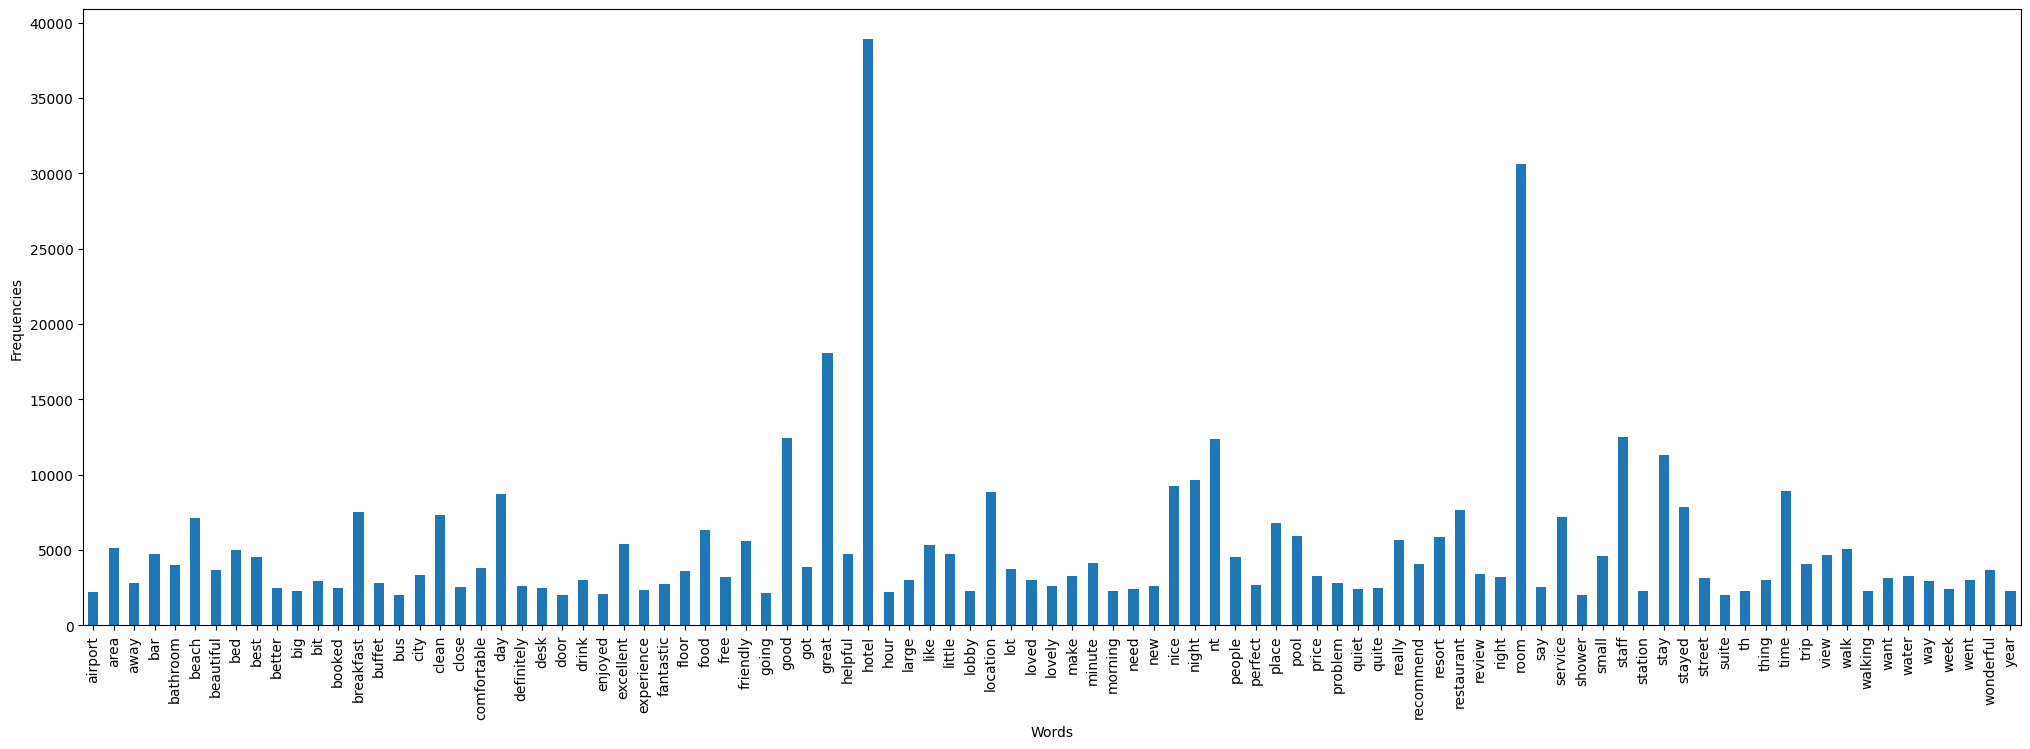

In [157]:
# Visualize the frequency of each word appearance
import matplotlib.pyplot as plt

column_sums = df_filtered_high_rating_bow.sum()

plt.figure(figsize=(25, 8))
column_sums.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()

Low Ranking Rating Reviews

In [158]:
# Transform the textual data via BoW model 
bow = vectorizer.fit_transform(low_ranking_reviews["new_text"])

# Retrieve the Word names (features)
words = vectorizer.get_feature_names_out()
# Retreive word frequency matrix
bow_matrix = bow.toarray()

# Generate BoW DataFrame
df_low_rating_bow = pd.DataFrame(bow_matrix, columns=words)
df_low_rating_bow.head()

#24,269 words used in the dataset
#Some columns contain unreliable informaiton

,aa,aaa,aaaaa,aaah,aarp,aarrgh,aback,abandon,abandoned,abandoning,...,zoo,zoolike,zoologicher,zoom,zoomed,zooming,zyrtec,zytec,zzzt,zzzzt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
# Filter columns with a sum less than 2000
column_sums = df_low_rating_bow.sum()
filtered_columns = column_sums[column_sums >= 2000].index

# Create a new DataFrame with the filtered columns
df_filtered_low_rating_bow = df_low_rating_bow[filtered_columns]
df_filtered_low_rating_bow.head()

,day,good,hotel,night,nt,room,service,staff,stay,time
0,1,4,7,2,0,6,0,2,1,0
1,0,0,2,2,2,0,0,0,0,0
2,0,0,4,0,0,5,1,1,2,0
3,1,2,8,0,6,2,4,6,1,5
4,0,1,0,1,0,1,0,1,1,0


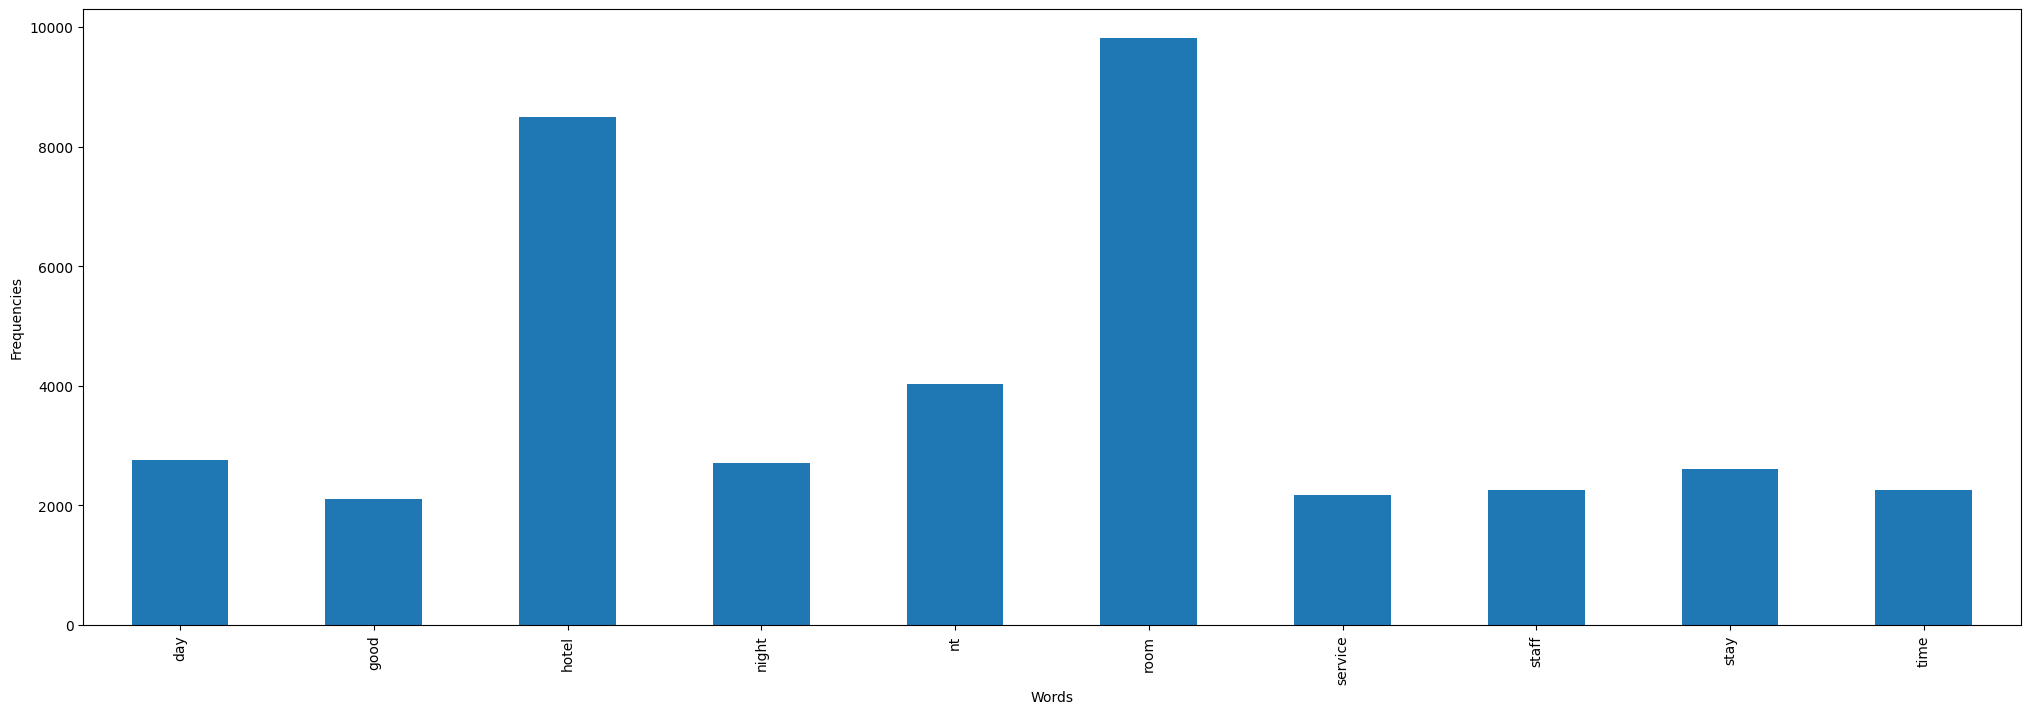

In [160]:
# Visualize the frequency of each word appearance
import matplotlib.pyplot as plt

column_sums = df_filtered_low_rating_bow.sum()

plt.figure(figsize=(25, 8))
column_sums.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()

# TF-IDF Model

High Ranking Rating Reviews

In [161]:
# Import TfidfVectorizer method (TF-IDF model) from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF model via TfidfVectorizer
vectorizer = TfidfVectorizer()
# Transform the textual data via TF-IDF model
tfidf = vectorizer.fit_transform(high_ranking_reviews["new_text"])

# Retrieve the Word names (features)
words = vectorizer.get_feature_names_out()
# Retreive TF-IDF matrix
tfidf_matrix = tfidf.toarray()

# Generate BoW DataFrame
df_tfidf_high = pd.DataFrame(tfidf_matrix, columns=words)
df_tfidf_high.head()

# Create a new DataFrame with the filtered columns (from BoW)
df_filtered_tfidf_high = df_tfidf_high[filtered_columns]
df_filtered_tfidf_high.head()

,day,good,hotel,night,nt,room,service,staff,stay,time
0,0.0,0.045347,0.060591,0.094373,0.000000,0.089876,0.000000,0.000000,0.085034,0.000000
1,0.0,0.000000,0.100020,0.000000,0.081981,0.024727,0.045436,0.031444,0.070184,0.042833
2,0.0,0.023563,0.047227,0.000000,0.154839,0.031134,0.057210,0.019796,0.044185,0.026966
3,0.0,0.028990,0.038736,0.000000,0.031750,0.038305,0.035193,0.024356,0.054362,0.000000
4,0.0,0.072969,0.024375,0.037965,0.000000,0.072311,0.000000,0.061304,0.068415,0.000000


In [162]:
# Select only Reviews 0~9 (the first 10 reviews)
df_selected_high_reviews = df_filtered_tfidf_high.iloc[0:10]

# Filter columns with a sum less than 0.5
column_sums = df_selected_high_reviews.sum()
new_filtered_columns = column_sums[column_sums >= 0.1].index

# Create a new DataFrame with the filtered columns
df_selected_high_reviews = df_selected_high_reviews[new_filtered_columns]
df_selected_high_reviews.head()

,good,hotel,night,nt,room,service,staff,stay,time
0,0.045347,0.060591,0.094373,0.000000,0.089876,0.000000,0.000000,0.085034,0.000000
1,0.000000,0.100020,0.000000,0.081981,0.024727,0.045436,0.031444,0.070184,0.042833
2,0.023563,0.047227,0.000000,0.154839,0.031134,0.057210,0.019796,0.044185,0.026966
3,0.028990,0.038736,0.000000,0.031750,0.038305,0.035193,0.024356,0.054362,0.000000
4,0.072969,0.024375,0.037965,0.000000,0.072311,0.000000,0.061304,0.068415,0.000000


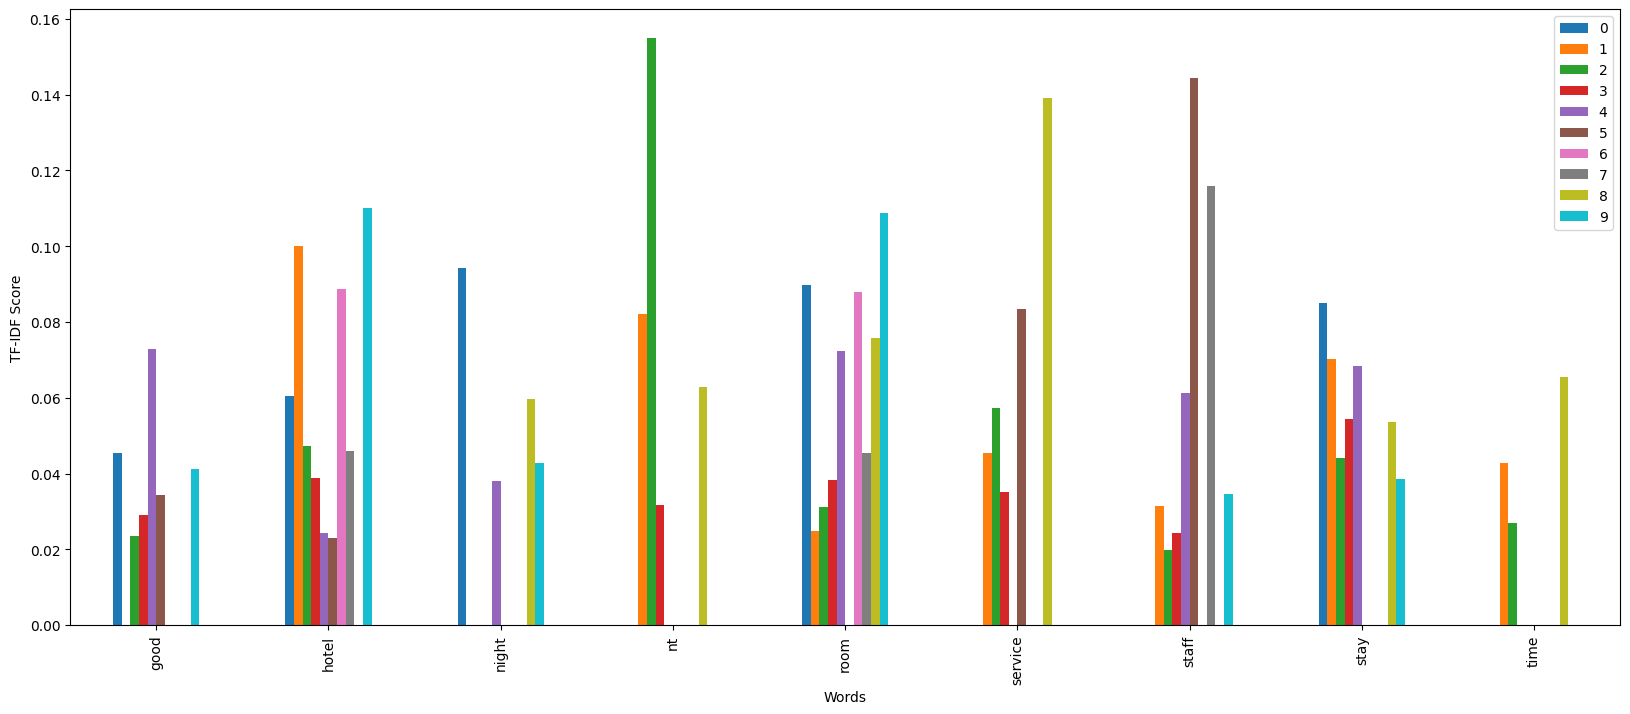

In [163]:
# Visualize the TF-IDF scores of Reviews 0~4 (the first 5 reviews)

df_selected_high_reviews.T.plot(kind='bar', figsize=(20,8))
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.show()

Low Ranking Rating Reviews

In [164]:
# Initialize the TF-IDF model via TfidfVectorizer
vectorizer = TfidfVectorizer()
# Transform the textual data via TF-IDF model
tfidf = vectorizer.fit_transform(low_ranking_reviews["new_text"])

# Retrieve the Word names (features)
words = vectorizer.get_feature_names_out()
# Retreive TF-IDF matrix
tfidf_matrix = tfidf.toarray()

# Generate BoW DataFrame
df_tfidf_low = pd.DataFrame(tfidf_matrix, columns=words)
df_tfidf_low.head()

# Create a new DataFrame with the filtered columns (from BoW)
df_filtered_tfidf_low = df_tfidf_low[filtered_columns]
df_filtered_tfidf_low.head()

,day,good,hotel,night,nt,room,service,staff,stay,time
0,0.022164,0.092275,0.101913,0.041155,0.000000,0.082209,0.000000,0.042945,0.020058,0.000000
1,0.000000,0.000000,0.079032,0.111704,0.108805,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.063801,0.000000,0.000000,0.075054,0.026494,0.023524,0.043950,0.000000
3,0.024136,0.050242,0.126833,0.000000,0.130959,0.029841,0.105336,0.140295,0.021843,0.124834
4,0.000000,0.082540,0.000000,0.073627,0.000000,0.049024,0.000000,0.076828,0.071768,0.000000


In [165]:
# Select only Reviews 0~9 (the first 10 reviews)
df_selected_low_reviews = df_filtered_tfidf_low.iloc[0:10]

# Filter columns with a sum less than 0.5
column_sums = df_selected_low_reviews.sum()
new_filtered_columns = column_sums[column_sums >= 0.1].index

# Create a new DataFrame with the filtered columns
df_selected_low_reviews = df_selected_low_reviews[new_filtered_columns]
df_selected_low_reviews.head()

,good,hotel,night,nt,room,service,staff,stay,time
0,0.092275,0.101913,0.041155,0.000000,0.082209,0.000000,0.042945,0.020058,0.000000
1,0.000000,0.079032,0.111704,0.108805,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.063801,0.000000,0.000000,0.075054,0.026494,0.023524,0.043950,0.000000
3,0.050242,0.126833,0.000000,0.130959,0.029841,0.105336,0.140295,0.021843,0.124834
4,0.082540,0.000000,0.073627,0.000000,0.049024,0.000000,0.076828,0.071768,0.000000


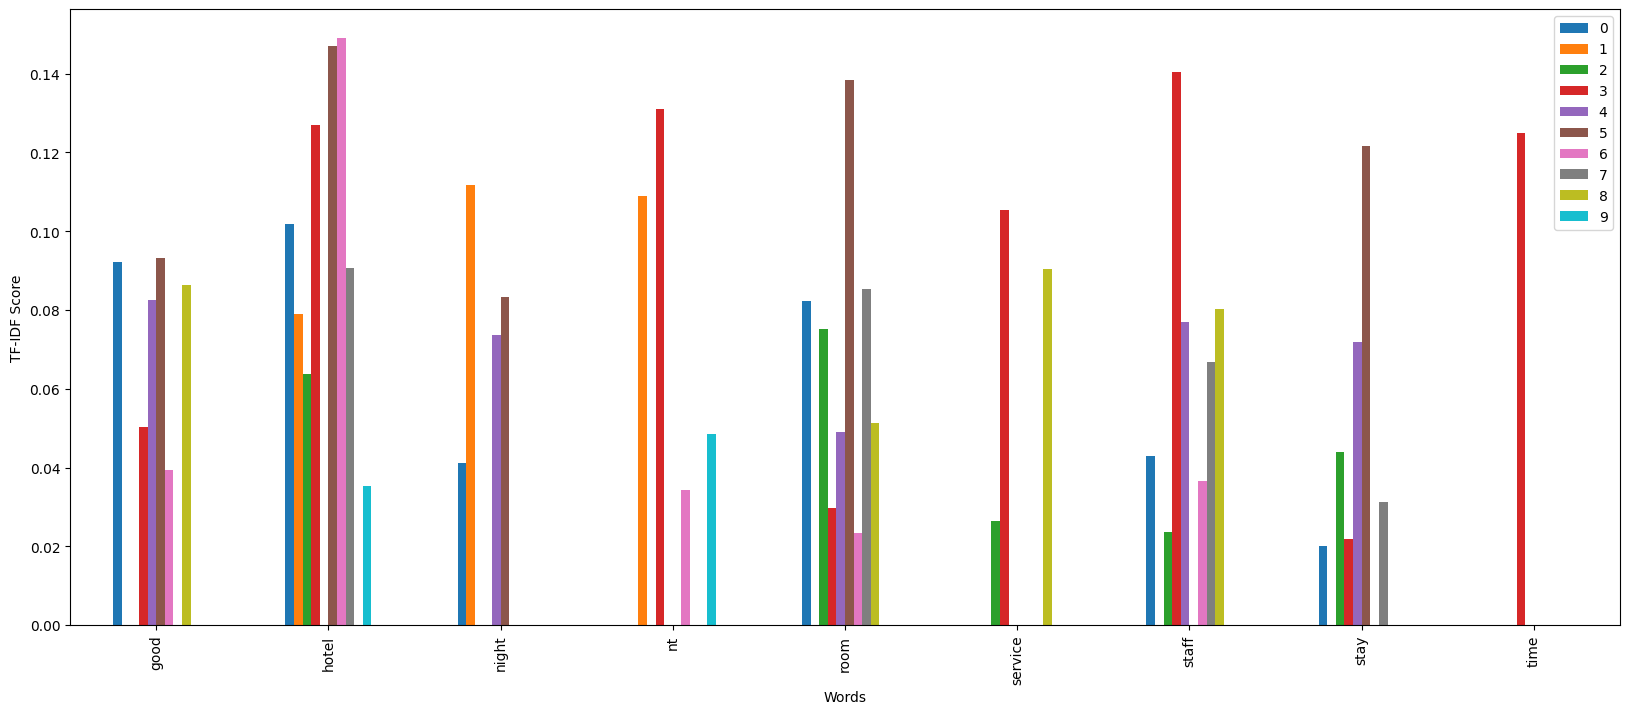

In [166]:
# Visualize the TF-IDF scores of Reviews 0~4 (the first 5 reviews)

df_selected_low_reviews.T.plot(kind='bar', figsize=(20,8))
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.show()

# Word Embeddings

High Ranking Rating Reviews

In [167]:
# Import Word2Vec method from gensim library
from gensim.models import Word2Vec

# Initialize the Word2Vec model
high_rating_model = Word2Vec(sentences=high_ranking_reviews["lemmatized_words"], vector_size=5, window=5, min_count=1, workers=4)

# Get the vector for a word
word_vector = high_rating_model.wv['hotel']
print("Vector for 'area':", word_vector)

# Find most similar words
similar_words = high_rating_model.wv.most_similar('area', topn=5)
print("Most similar words to 'area':", similar_words)

Vector for 'area': [ 0.01934972  4.1316657   3.319899   -1.559415   -0.8229291 ]
Most similar words to 'area': [('dissapointedflightwe', 0.9950150847434998), ('roomnice', 0.9938495755195618), ('guestslook', 0.9919593930244446), ('busyoverall', 0.9916051626205444), ('soneven', 0.9911092519760132)]


In [168]:
# Word Analogies Test
analogy_result = high_rating_model.wv.most_similar(positive=['hotel', 'evening'], negative=['bad'], topn=5)
print("Word analogy result for 'hotel' + 'evening' - 'bad':\n", analogy_result)

# Word Similarity Test
similarity = high_rating_model.wv.similarity('hotel', 'comfortable')
print("Similarity between 'hotel' and 'comfortable':", similarity)

Word analogy result for 'hotel' + 'evening' - 'bad':
 [('tobbaco', 0.9945139288902283), ('pricealso', 0.9937214255332947), ('bestsherry', 0.9909356236457825), ('towelit', 0.9906852841377258), ('standpoint', 0.9887564778327942)]
Similarity between 'hotel' and 'comfortable': 0.56440264


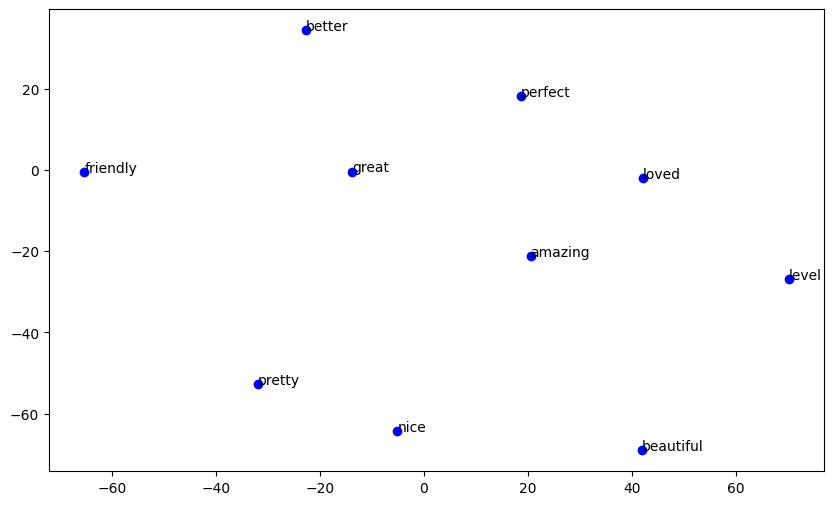

In [169]:
# Visualizing Embeddings
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of words for visualization
words = ['nice','loved','great','perfect','amazing','level','better','beautiful','pretty','friendly']
word_vectors = np.array([high_rating_model.wv[word] for word in words])

# Reduce dimensionality
tsne = TSNE(n_components=2, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the embeddings
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.show()

Low Ranking Rating Reviews

In [170]:
# Import Word2Vec method from gensim library
from gensim.models import Word2Vec

# Initialize the Word2Vec model
low_rating_model = Word2Vec(sentences=low_ranking_reviews["lemmatized_words"], vector_size=5, window=5, min_count=1, workers=4)

# Get the vector for a word
word_vector = low_rating_model.wv['hotel']
print("Vector for 'area':", word_vector)

# Find most similar words
similar_words = low_rating_model.wv.most_similar('area', topn=5)
print("Most similar words to 'area':", similar_words)

Vector for 'area': [-2.5690367  2.9836586  4.2611036 -2.3134098 -1.2480774]
Most similar words to 'area': [('abc', 0.9932689070701599), ('nonchalance', 0.989899754524231), ('bagsmy', 0.9887874722480774), ('sandy', 0.9869830012321472), ('ostrich', 0.986391007900238)]


In [171]:
# Word Analogies Test
analogy_result = low_rating_model.wv.most_similar(positive=['hotel', 'evening'], negative=['bad'], topn=5)
print("Word analogy result for 'hotel' + 'evening' - 'bad':\n", analogy_result)

# Word Similarity Test
similarity = low_rating_model.wv.similarity('hotel', 'comfortable')
print("Similarity between 'hotel' and 'comfortable':", similarity)

Word analogy result for 'hotel' + 'evening' - 'bad':
 [('elena', 0.9944267868995667), ('runaround', 0.993401825428009), ('colorado', 0.9904168844223022), ('yahoo', 0.98923259973526), ('urge', 0.9864786863327026)]
Similarity between 'hotel' and 'comfortable': 0.6575634


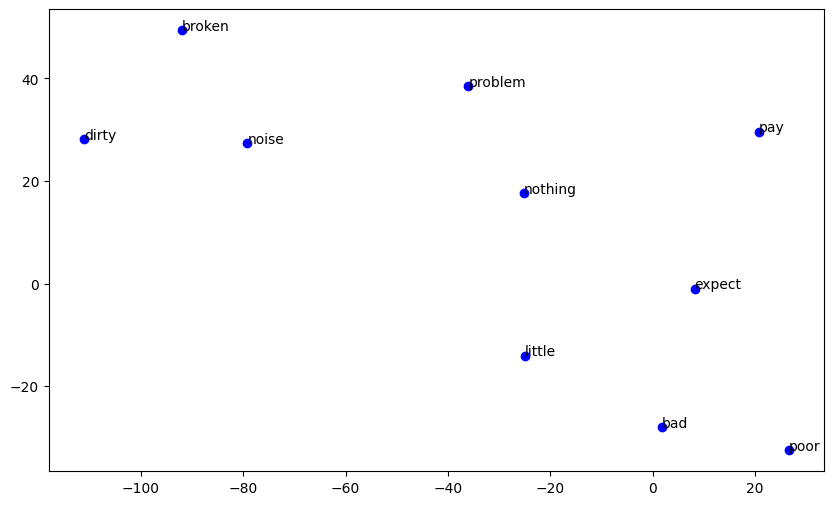

In [178]:
# Select a subset of words for visualization
words = ['bad','problem','expect','poor','pay','noise','little','broken','dirty','nothing']
word_vectors = np.array([low_rating_model.wv[word] for word in words])

# Reduce dimensionality
tsne = TSNE(n_components=2, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the embeddings
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.show()

# Text Representation with N-grams

In [173]:
# For BoW, add "ngram_range" at the initialization step
vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))  # unigrams, bigrams, and trigrams

In [174]:
# For TF-IDF, add "ngram_range" at the initialization step
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # unigrams, bigrams, and trigrams

In [175]:
# For Word2Vec, "window" parameter determines the closeness of words to be considered
high_rating_model = Word2Vec(sentences=high_ranking_reviews["lemmatized_words"], vector_size=5, window=5, min_count=1, workers=4)

# PoS Tagging

High Ranking Rating Reviews 

In [176]:
# Retrieve the list of tokenized words from the first review
sample = high_ranking_reviews.iloc[0]["word_token"]

# Apply PoS tagging
sample_pos = pos_tag(sample)
print(sample_pos)

[('nice', 'JJ'), ('hotel', 'NN'), ('expensive', 'JJ'), ('parking', 'NN'), ('got', 'VBD'), ('good', 'JJ'), ('deal', 'NN'), ('stay', 'VB'), ('hotel', 'NN'), ('anniversary', 'JJ'), ('arrived', 'VBD'), ('late', 'JJ'), ('evening', 'NN'), ('took', 'VBD'), ('advice', 'RB'), ('previous', 'JJ'), ('reviews', 'NNS'), ('did', 'VBD'), ('valet', 'VB'), ('parking', 'VBG'), ('check', 'VB'), ('quick', 'JJ'), ('easy', 'JJ'), ('little', 'JJ'), ('disappointed', 'JJ'), ('nonexistent', 'JJ'), ('view', 'NN'), ('room', 'NN'), ('room', 'NN'), ('clean', 'JJ'), ('nice', 'JJ'), ('size', 'NN'), ('bed', 'VBD'), ('comfortable', 'JJ'), ('woke', 'NN'), ('stiff', 'JJ'), ('neck', 'RB'), ('high', 'JJ'), ('pillows', 'NNS'), ('not', 'RB'), ('soundproof', 'VB'), ('like', 'IN'), ('heard', 'NN'), ('music', 'NN'), ('room', 'NN'), ('night', 'NN'), ('morning', 'NN'), ('loud', 'JJ'), ('bangs', 'NNS'), ('doors', 'NNS'), ('opening', 'VBG'), ('closing', 'NN'), ('hear', 'JJ'), ('people', 'NNS'), ('talking', 'VBG'), ('hallway', 'JJ'),

Low Ranking Rating Reviews 

In [177]:
# Retrieve the list of tokenized words from the first review
sample = low_ranking_reviews.iloc[0]["word_token"]

# Apply PoS tagging
sample_pos = pos_tag(sample)
print(sample_pos)

[('ok', 'JJ'), ('nothing', 'NN'), ('special', 'JJ'), ('charge', 'NN'), ('diamond', 'NN'), ('member', 'NN'), ('hilton', 'NN'), ('decided', 'VBD'), ('chain', 'NN'), ('shot', 'NN'), ('th', 'NN'), ('anniversary', 'JJ'), ('seattle', 'JJ'), ('start', 'NN'), ('booked', 'VBD'), ('suite', 'NN'), ('paid', 'VBN'), ('extra', 'JJ'), ('website', 'JJ'), ('description', 'NN'), ('not', 'RB'), ('suite', 'JJ'), ('bedroom', 'NN'), ('bathroom', 'NN'), ('standard', 'JJ'), ('hotel', 'NN'), ('room', 'NN'), ('took', 'VBD'), ('printed', 'JJ'), ('reservation', 'NN'), ('desk', 'NN'), ('showed', 'VBD'), ('said', 'VBD'), ('things', 'NNS'), ('like', 'IN'), ('tv', 'NN'), ('couch', 'JJ'), ('ect', 'NN'), ('desk', 'NN'), ('clerk', 'NN'), ('told', 'VBD'), ('oh', 'UH'), ('mixed', 'JJ'), ('suites', 'NNS'), ('description', 'VBP'), ('kimpton', 'NNP'), ('website', 'NN'), ('sorry', 'NN'), ('free', 'JJ'), ('breakfast', 'NN'), ('got', 'VBD'), ('kidding', 'VBG'), ('embassy', 'JJ'), ('suits', 'NNS'), ('sitting', 'VBG'), ('room', '